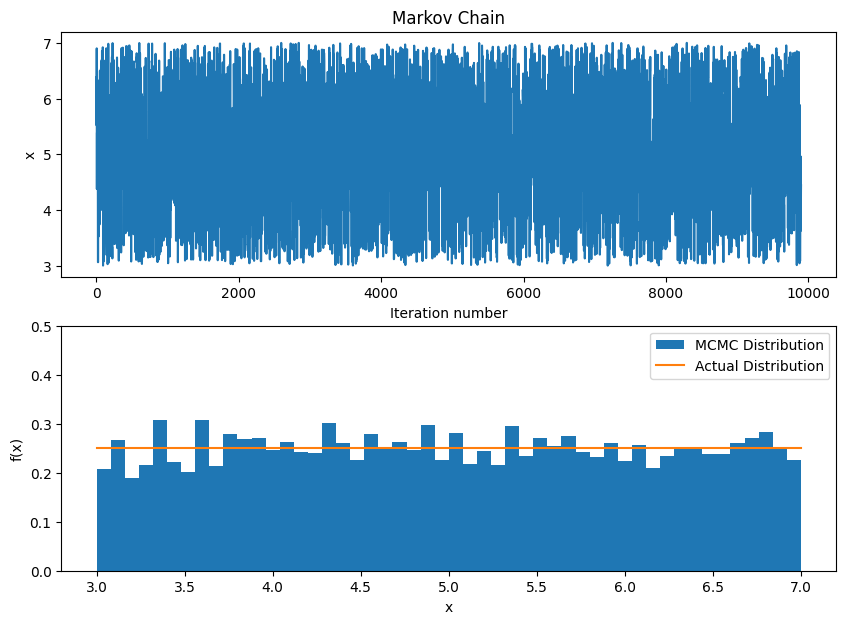

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(value):
    if 3 < value < 7:
        return 1
    else:
        return 0

total_iterations = 10000
burn_in_period = 100
initial_value = 5
positions, iterations = [], []
iteration_count = 0

for iteration in range(total_iterations):
    proposed_value = initial_value + np.random.normal(0, 2)
    acceptance_probability = np.random.rand()
    
    if step_function(proposed_value) / step_function(initial_value) > acceptance_probability:
        initial_value = proposed_value
    
    if iteration > burn_in_period:
        iteration_count += 1
        positions.append(initial_value)
        iterations.append(iteration_count)

figure, (chain_plot, histogram_plot) = plt.subplots(2, figsize=(10, 7))

chain_plot.set_title('Markov Chain')
chain_plot.plot(iterations, positions)
chain_plot.set_xlabel('Iteration number')
chain_plot.set_ylabel('x')

histogram_plot.hist(positions, 50, density=True, label='MCMC Distribution')
histogram_plot.plot([3, 7], [0.25, 0.25], label='Actual Distribution')
histogram_plot.set_xlabel('x')
histogram_plot.set_ylabel('f(x)')
histogram_plot.legend()
histogram_plot.set_ylim([0, 0.5])

plt.show()
